In [3]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

AUC: 0.895


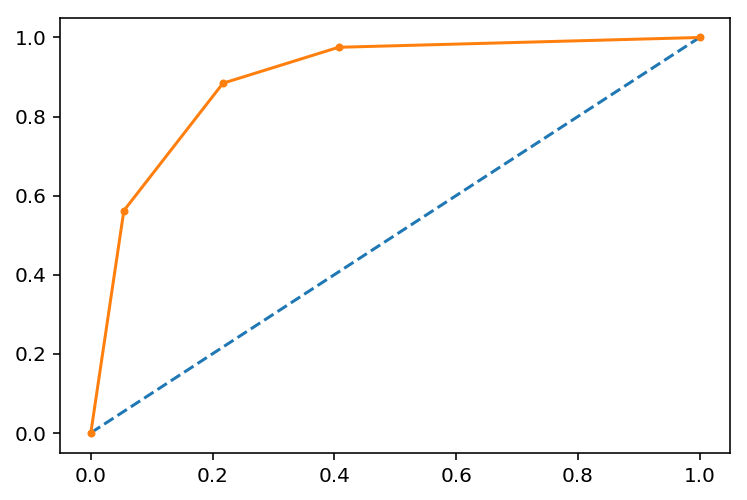

In [4]:
###code from
###https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [8]:
def calculate_auc(fpr,tpr):
    area = 0
    for i in range(1,len(fpr)):
        ver = (tpr[i]+tpr[i-1])/2
        hor = fpr[i]-fpr[i-1]
        area += ver*hor
    return area
        

In [9]:
calculate_auc(fpr,tpr)

0.895220706002947